# Structural Dynamics Validation (Tendons)

In [1]:
# Amira Abdel-Rahman
# (c) Massachusetts Institute of Technology 2021

# tested using julia 1.5.2 and macbook pro

In [2]:
plotting=true
GPU=false
logging=true
include("../julia/MetaVoxels.jl") #load MetaVoxels!

Loaded MetaVoxels Functions!


In [43]:
using CSV;
using DataFrames;

## Old

In [112]:
nodesPhys=fill(0.0,10,12,2)

for t=5:5:60
    file="../julia/examples/CAD_Rhino/tendon_data/$(t)mmstrain.csv"
    df = CSV.File(file,header=false) |> DataFrame
    for i=1:10
        nodesPhys[Int(df[i,1]),Int(t/5),1]=df[Int(i),2];#x
        nodesPhys[Int(df[i,1]),Int(t/5),2]=df[Int(i),3];#y
    end
end

In [113]:
simName="newTendon"

# get a saved setup from an external julia file
# include("./julia/examples/thermalTest.jl") #template for multimaterial hierarchical voxels with different thermal coefficient of thermal expansion 
include("../julia/examples/tendon.jl") #template for lattice voxel (big scale with real params)


## recompile these just for sanity check for dynamic loads
include("../julia/MetaVoxels.jl") 

#export setup using nodejs and javascript from "./json/$(simName)Init.json" and save to "./json/$(simName).json"
exportJuliaSettingsUsingNode(setup,simName)

setupSim=getSetup(simName); #get simulation from"./json/$(simName).json"
savedDataFolderPath="../json/$(simName)/" # make sure this folder exists, this is where the simulation result will be saved
runMetaVoxels!(setupSim,savedDataFolderPath,"CPU")

Loaded MetaVoxels Functions!
Success! Created structure with 44 nodes and 109 edges.
dt: 0.0014172978482285626, s: 75.0, mass: 11.89524, momentInertiaInverse: 0.02852895
first timestep took 1.232047895 seconds
ran 44 nodes and 109 edges for 80000 time steps took 49.851961761 seconds


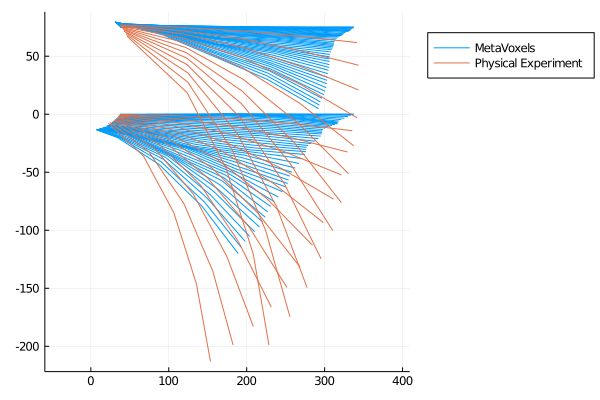

Loaded MetaVoxels Functions!


In [114]:
include("../julia/MetaVoxels.jl") #load MetaVoxels!
skip=0
plotDetailedTendonVSphysical(simName,nodesPhys,skip)# damp=0.0001 28*1.4 temp 1 40000 then 80000

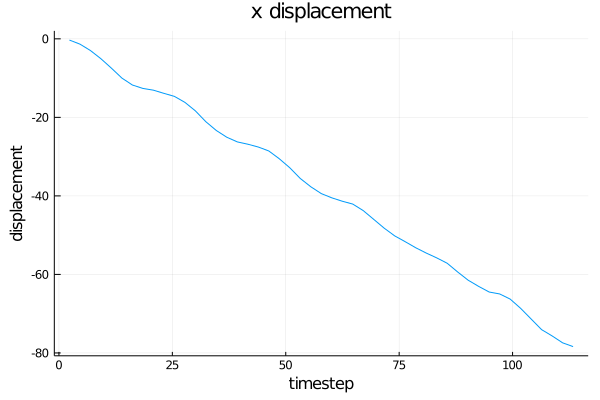

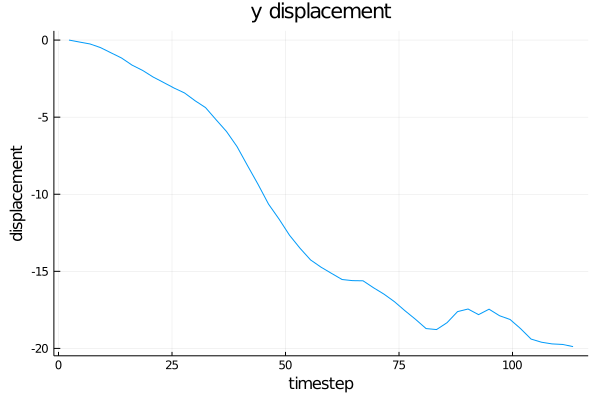

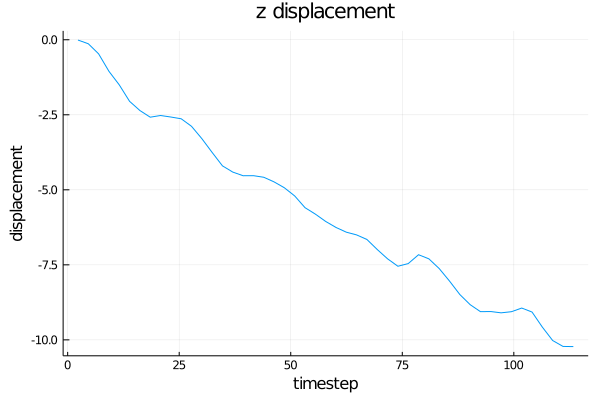

In [115]:
tendonIds = [5,7,17,25,33]
disXs=plotDisplacementTroughTimeSteps(simName,33,"x");
disXs=plotDisplacementTroughTimeSteps(simName,33,"y");
disXs=plotDisplacementTroughTimeSteps(simName,33,"z");


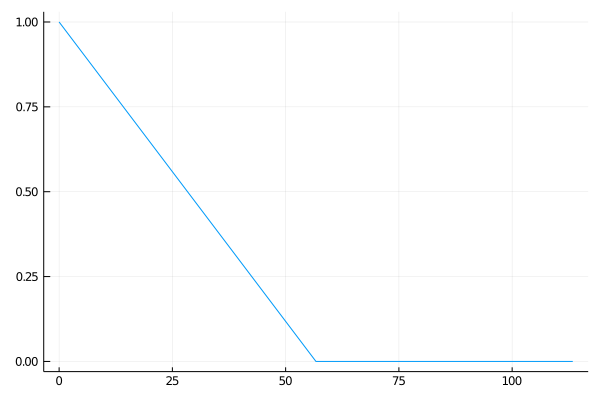

In [108]:
function forceProfile(currentRestLength,currentTimeStep)
    if currentTimeStep<40000
        temp=-1.0*currentTimeStep/40000 
        currentRestLength=1+1*(temp*1)
    end
    return currentRestLength
end

currentRestLength=1
m=[]
for i= 1:80000
    currentRestLength=forceProfile(currentRestLength,i)
    append!(m,[currentRestLength])
end


setupViz=getSetup1("$(simName)/0")
maxNumFiles=setupViz["maxNumFiles"]
numTimeSteps=setupViz["numTimeSteps"]

x=(1:numTimeSteps).*setupViz["dt"]

plot(x,m,label="")
# plot(m,label="")

## Tendons New

In [218]:
simName="newTendon"

# get a saved setup from an external julia file
# include("./julia/examples/thermalTest.jl") #template for multimaterial hierarchical voxels with different thermal coefficient of thermal expansion 
include("../julia/examples/tendonNew.jl") #template for lattice voxel (big scale with real params)


## recompile these just for sanity check for dynamic loads
include("../julia/MetaVoxels.jl") 

#export setup using nodejs and javascript from "./json/$(simName)Init.json" and save to "./json/$(simName).json"
exportJuliaSettingsUsingNode(setup,simName)

setupSim=getSetup(simName); #get simulation from"./json/$(simName).json"
savedDataFolderPath="../json/$(simName)/" # make sure this folder exists, this is where the simulation result will be saved
runMetaVoxels!(setupSim,savedDataFolderPath,"CPU")

"10%"

"20%"

"30%"

"40%"

"50%"

"60%"

"70%"

"80%"

"90%"

Loaded MetaVoxels Functions!
Success! Created structure with 44 nodes and 109 edges.
dt: 6.12722445999435e-7, s: 75.0, mass: 1.1116e-6, momentInertiaInverse: 305277.93393148
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
first timestep took 1.789061692 seconds
[12.0, 11.967144861181554, 11.946954779727347, 11.93835606713386, 11.935317444546524, NaN]
[24.0, 23.927821173107304, 23.865636328134382, 23.83683650922592, 23.832546264755937, NaN]
[36.0, 35.83104675416455, 35.69343474996003, 35.62876510435123, 35.605209372634576, NaN]
[48.0, 47.682482619709226, 47.52402142592849, 47.403500731704774, 47.39496886940026, NaN]
[60.0, 59.56674066619799, 59.24004532223907, 59.18466355934332, 59.08797970269414, NaN]
[72.0, 71.52076519954879, 71.1003993111149, 70.8752410830479, 70.80143989384796, 2.481117675e-314]
[84.0, 83.39446313579019, 82.76133518701984, 82.39123012552356, 82.29690390837607, 2.0e-323]
[96.0, 94.94238065043275, 94.35652078764355, 93.88110244760375, 93.64724001884844, 2.3256495395e-314]
[108.0, 106.

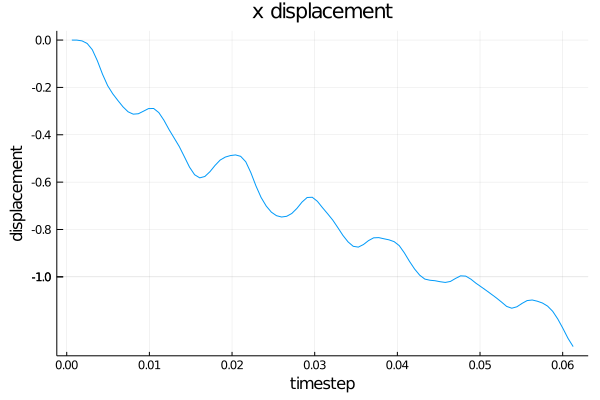

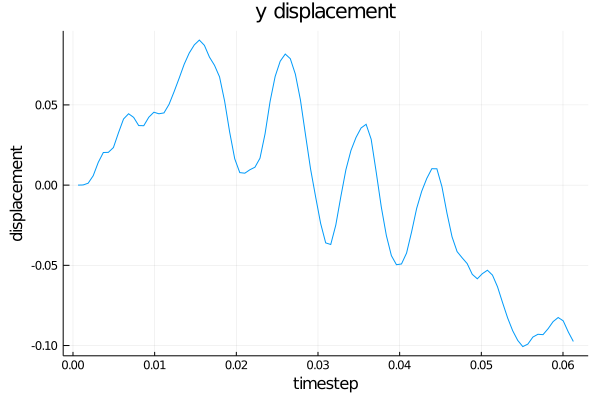

In [219]:
disXs=plotDisplacementTroughTimeSteps(simName,37,"x");
disXs=plotDisplacementTroughTimeSteps(simName,37,"y");
# disXs=plotDisplacementTroughTimeSteps(simName,37,"z");

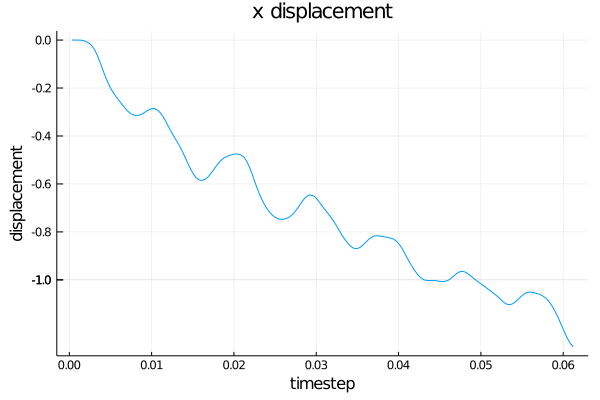

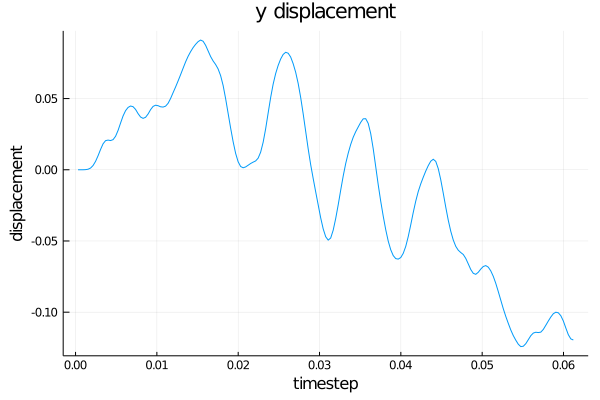

In [217]:
disXs=plotDisplacementTroughTimeSteps(simName,37,"x");
disXs=plotDisplacementTroughTimeSteps(simName,37,"y");
# disXs=plotDisplacementTroughTimeSteps(simName,37,"z");

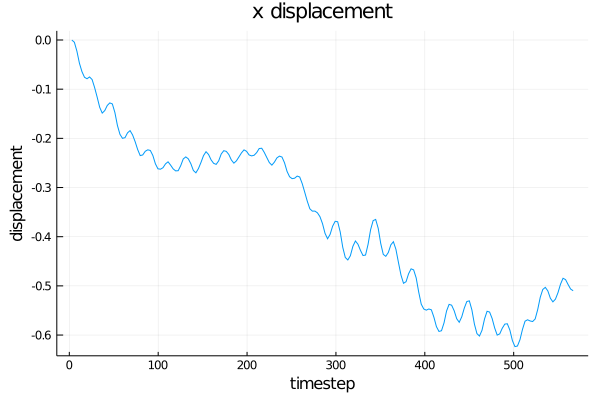

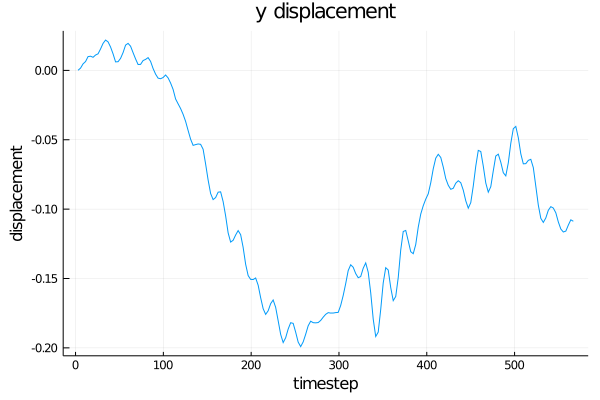

In [184]:
disXs=plotDisplacementTroughTimeSteps(simName,37,"x");
disXs=plotDisplacementTroughTimeSteps(simName,37,"y");
# disXs=plotDisplacementTroughTimeSteps(simName,37,"z");

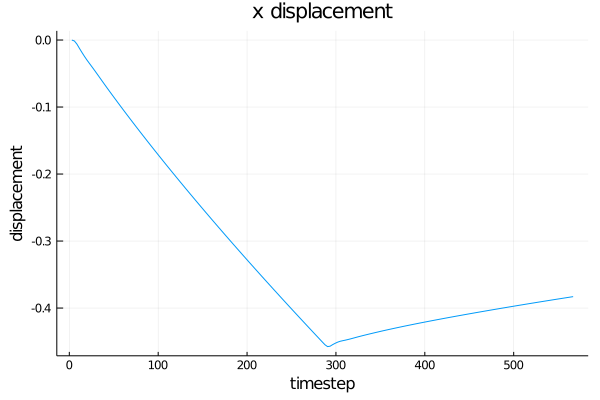

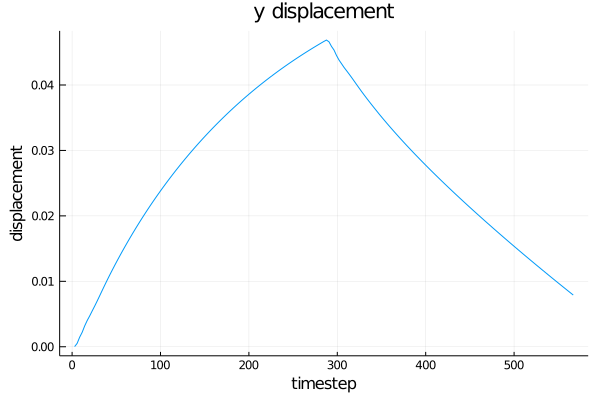

In [166]:
disXs=plotDisplacementTroughTimeSteps(simName,37,"x");
disXs=plotDisplacementTroughTimeSteps(simName,37,"y");
# disXs=plotDisplacementTroughTimeSteps(simName,37,"z");

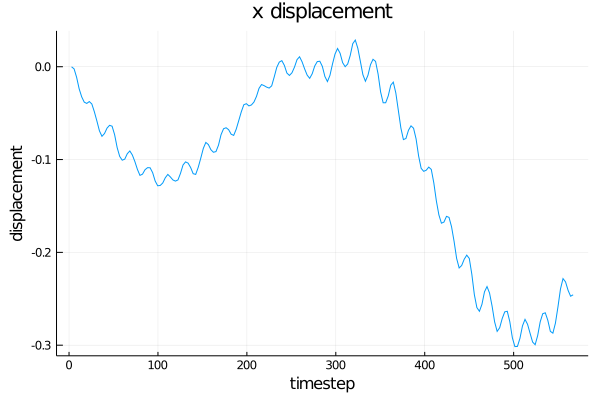

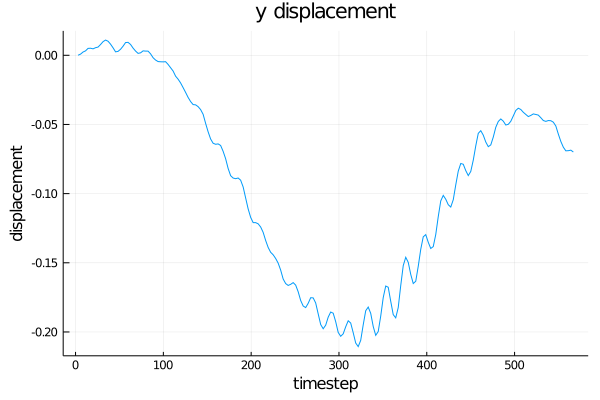

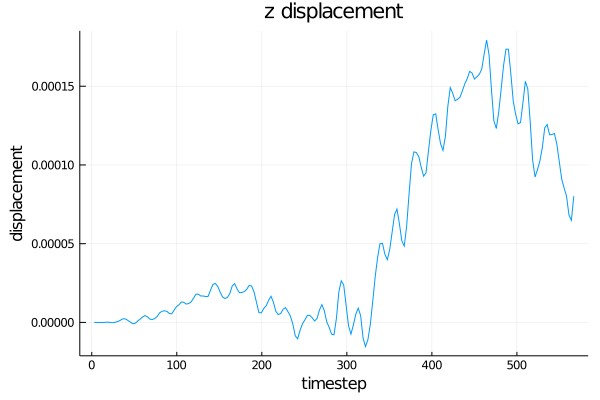

In [158]:
disXs=plotDisplacementTroughTimeSteps(simName,37,"x");
disXs=plotDisplacementTroughTimeSteps(simName,37,"y");
disXs=plotDisplacementTroughTimeSteps(simName,37,"z");

In [148]:
#get last node
id=1
for (i,node) in enumerate(setupSim["nodes"])
    if node["position"]["y"]/setupSim["scale"]>=setupSim["voxelSize"]*1  &&node["position"]["z"]/setupSim["scale"]==0.0
        id=i
#         println(node["position"]["x"]/setupSim["scale"])
        print("$id,")
    end
end

3,17,24,31,38,

In [194]:
#get last node
id=1
for (i,node) in enumerate(setupSim["nodes"])
    if node["position"]["y"]/setupSim["scale"]==0  &&node["position"]["z"]/setupSim["scale"]>0.0&&node["position"]["z"]/setupSim["scale"]<setupSim["voxelSize"]
        id=i
        println(node["position"]["x"]/setupSim["scale"])
        println("$id,")
    end
end

300.0000000000001
1,
375.0000000000001
2,
225.00000000000009
13,
150.00000000000006
14,
75.00000000000003
15,
0.0
16,


In [150]:
#get last node
id=1
for (i,node) in enumerate(setupSim["nodes"])
    if node["position"]["y"]/setupSim["scale"]>=setupSim["voxelSize"]*1  &&node["position"]["z"]/setupSim["scale"]>0.0&&node["position"]["z"]/setupSim["scale"]<setupSim["voxelSize"]
        id=i
        print("$id,")
    end
end

11,12,23,30,37,44,

In [171]:
#run node.js to serve the indexTutorial.html for visualizarion
mycommand = `node ../node/serve.js $(simName)`
run(mycommand)

LoadError: [91mfailed process: Process(`[4mnode[24m [4m../node/serve.js[24m [4mnewTendon[24m`, ProcessSignaled(2)) [0][39m


In [142]:
mxx=10000
for i=1:mxx
    if mod(i,10000/100)==0
        print("$(Int(i/100))%,")
    end
end

1%,2%,3%,4%,5%,6%,7%,8%,9%,10%,11%,12%,13%,14%,15%,16%,17%,18%,19%,20%,21%,22%,23%,24%,25%,26%,27%,28%,29%,30%,31%,32%,33%,34%,35%,36%,37%,38%,39%,40%,41%,42%,43%,44%,45%,46%,47%,48%,49%,50%,51%,52%,53%,54%,55%,56%,57%,58%,59%,60%,61%,62%,63%,64%,65%,66%,67%,68%,69%,70%,71%,72%,73%,74%,75%,76%,77%,78%,79%,80%,81%,82%,83%,84%,85%,86%,87%,88%,89%,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%,100%,